# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [1]:
#import
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [4]:
df = pd.read_csv('RTA_Dataset.csv')

In [6]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [9]:
df.shape

(12316, 32)

In [11]:
df.duplicated().sum()

0

In [13]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
4391,14:56:00,Tuesday,18-30,Male,High school,Employee,2-5yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Serious Injury
1011,7:50:00,Friday,18-30,Male,Elementary school,Employee,1-2yr,NaN,Owner,2-5yrs,...,Unknown,na,na,na,na,Driver,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
10205,15:15:00,Sunday,31-50,Male,Junior high school,Employee,5-10yr,Stationwagen,Owner,Unknown,...,Turnover,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Other,Slight Injury
4127,15:20:00,Saturday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No priority to pedestrian,Slight Injury
10750,20:51:00,Tuesday,18-30,Male,Junior high school,Employee,5-10yr,Public (13?45 seats),Owner,Unknown,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Moving Backward,Slight Injury
11573,9:05:00,Monday,Unknown,Male,Elementary school,Employee,5-10yr,Lorry (11?40Q),Owner,2-5yrs,...,Going straight,Driver or rider,Male,5,3,NaN,NaN,Not a Pedestrian,No distancing,Serious Injury
3157,0:40:00,Sunday,18-30,Male,Junior high school,Employee,Above 10yr,Ridden horse,Owner,NaN,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,Driving at high speed,Slight Injury
1677,14:03:00,Saturday,31-50,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overturning,Slight Injury
5904,7:21:00,Thursday,18-30,Male,Elementary school,Employee,5-10yr,Lorry (41?100Q),Owner,5-10yrs,...,Getting off,na,na,na,na,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7163,16:35:00,Wednesday,18-30,Male,Elementary school,Employee,5-10yr,Long lorry,Owner,2-5yrs,...,Getting off,Driver or rider,Male,Under 18,3,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [17]:
#It appears unknown age bands are almost always "Under 18" so I will fill it with the value "Under 18"
df[df['Age_band_of_driver'] == 'Unknown']['Educational_level'].value_counts()

Educational_level
Junior high school    984
Elementary school     261
High school           135
Above high school      34
Writing & reading      26
Illiterate              8
Unknown                 7
Name: count, dtype: int64

In [19]:
#Dropping non-needed columns
used_cols = ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Driving_experience', 'Area_accident_occured',
'Types_of_Junction', 'Light_conditions', 'Cause_of_accident', 'Accident_severity']

df = df.loc[:, used_cols]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Time                   12316 non-null  object
 1   Day_of_week            12316 non-null  object
 2   Age_band_of_driver     12316 non-null  object
 3   Sex_of_driver          12316 non-null  object
 4   Educational_level      11575 non-null  object
 5   Driving_experience     11487 non-null  object
 6   Area_accident_occured  12077 non-null  object
 7   Types_of_Junction      11429 non-null  object
 8   Light_conditions       12316 non-null  object
 9   Cause_of_accident      12316 non-null  object
 10  Accident_severity      12316 non-null  object
dtypes: object(11)
memory usage: 1.0+ MB


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [24]:
df.replace('Unknown', np.nan, regex=True, inplace=True)
df.replace('unknown', np.nan, regex=True, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Time                   12316 non-null  object
 1   Day_of_week            12316 non-null  object
 2   Age_band_of_driver     10768 non-null  object
 3   Sex_of_driver          12138 non-null  object
 4   Educational_level      11475 non-null  object
 5   Driving_experience     11454 non-null  object
 6   Area_accident_occured  12055 non-null  object
 7   Types_of_Junction      11238 non-null  object
 8   Light_conditions       12316 non-null  object
 9   Cause_of_accident      12291 non-null  object
 10  Accident_severity      12316 non-null  object
dtypes: object(11)
memory usage: 1.0+ MB


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

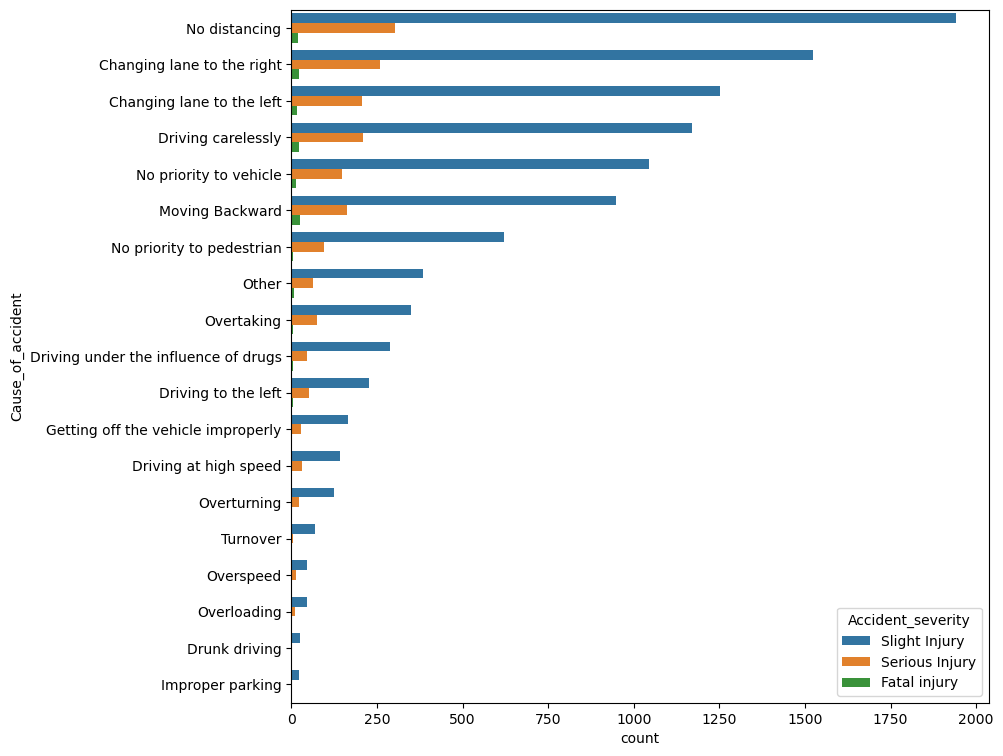

In [29]:
# In general, Series, Fatal car accidents occurs only rarely. However, we must zoom in to their causes to get a better understandinges
# - Most accidents occurs from two causes: 
# 1 - No Distancing
# 2 - Changing Lane to the right
# 3 - Changing Lane to the left
# Tracking which of the given indivisuals who does these behaviors will help with modeling accurecy.

plt.figure(figsize = [9,9])
sorted_cause = df['Cause_of_accident'].value_counts().index
sb.countplot(data = df, y = 'Cause_of_accident', hue = 'Accident_severity', order = sorted_cause);

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Time                   12316 non-null  object
 1   Day_of_week            12316 non-null  object
 2   Age_band_of_driver     10768 non-null  object
 3   Sex_of_driver          12138 non-null  object
 4   Educational_level      11475 non-null  object
 5   Driving_experience     11454 non-null  object
 6   Area_accident_occured  12055 non-null  object
 7   Types_of_Junction      11238 non-null  object
 8   Light_conditions       12316 non-null  object
 9   Cause_of_accident      12291 non-null  object
 10  Accident_severity      12316 non-null  object
dtypes: object(11)
memory usage: 1.0+ MB


In [38]:
sever_sum = pd.get_dummies(df['Accident_severity'], dtype = int)
df_test = pd.concat([df, sever_sum])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24632 entries, 0 to 12315
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   12316 non-null  object 
 1   Day_of_week            12316 non-null  object 
 2   Age_band_of_driver     10768 non-null  object 
 3   Sex_of_driver          12138 non-null  object 
 4   Educational_level      11475 non-null  object 
 5   Driving_experience     11454 non-null  object 
 6   Area_accident_occured  12055 non-null  object 
 7   Types_of_Junction      11238 non-null  object 
 8   Light_conditions       12316 non-null  object 
 9   Cause_of_accident      12291 non-null  object 
 10  Accident_severity      12316 non-null  object 
 11  Fatal injury           12316 non-null  float64
 12  Serious Injury         12316 non-null  float64
 13  Slight Injury          12316 non-null  float64
dtypes: float64(3), object(11)
memory usage: 2.8+ MB


Text(0.5, 1.0, 'Car accident counts distrubted within a week')

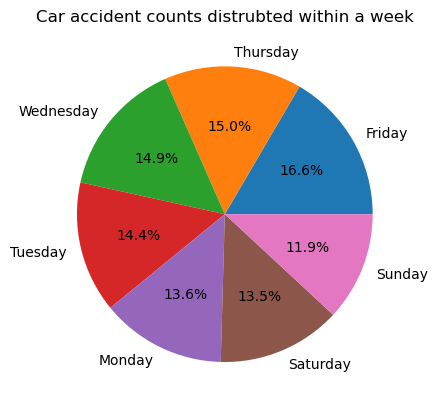

In [40]:

plt.pie(x = df['Day_of_week'].value_counts(), labels = df['Day_of_week'].value_counts().index, autopct = '%1.1f%%');
plt.title('Car accident counts distrubted within a week')

It seems like They are almost equally distrubted. This indicates that Day of week have

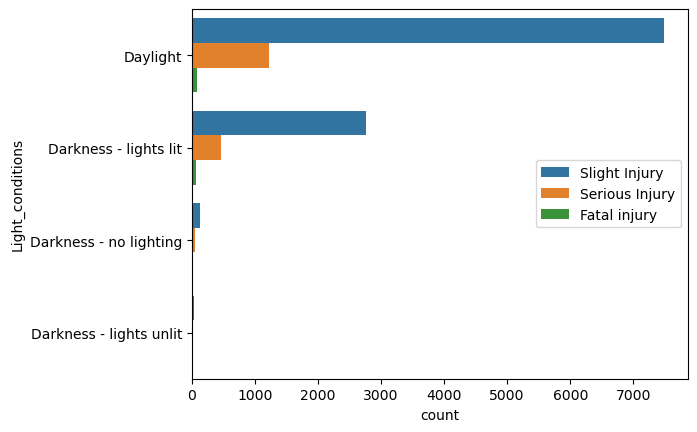

In [44]:
#Strange enough, most car accidents occurs while lights are ON
sb.countplot(data = df, y = 'Light_conditions', hue = 'Accident_severity')
plt.legend(loc = 'right')

<Axes: xlabel='count', ylabel='Cause_of_accident'>

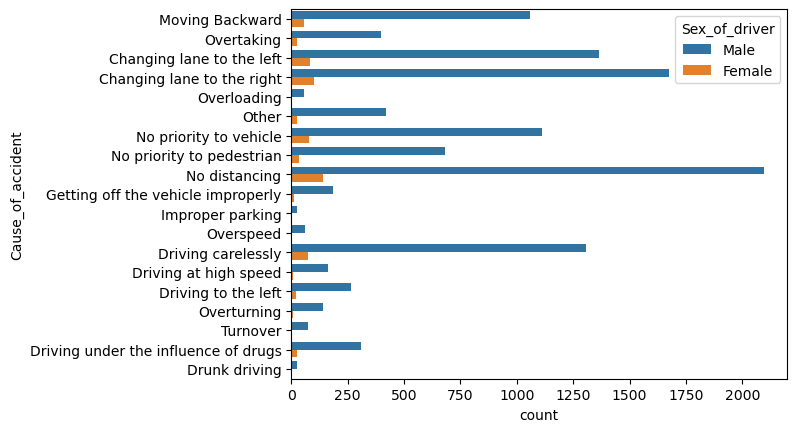

In [46]:
sb.countplot(data = df, y = 'Cause_of_accident', hue = 'Sex_of_driver')

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [49]:
X = df.drop(columns = 'Accident_severity')
y = df[['Accident_severity']]

In [51]:
X = X.drop(columns = ['Time', 'Day_of_week', 'Sex_of_driver', 'Educational_level', 'Area_accident_occured', 'Light_conditions'])

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [56]:
imputer = SimpleImputer(strategy = 'most_frequent')
encoder = OrdinalEncoder()

In [58]:


imp_pipe = Pipeline([('imputer', imputer)])
cat_pipe = Pipeline([('encoder', encoder)])

In [60]:
pipe = ColumnTransformer([('imp_pipe', imp_pipe, ['Driving_experience','Cause_of_accident']),
                         ('cat_pipe', cat_pipe, ['Driving_experience', 'Cause_of_accident'])])

In [ ]:
pipe = ColumnTransformer([('num_pipe', num_pipe, ['Age', 'Years of Experience']),
                         ('cat_pipe', cat_pipe, ['Gender', 'Positions'])])

In [62]:
pipe

ColumnTransformer(transformers=[('imp_pipe',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Driving_experience', 'Cause_of_accident']),
                                ('cat_pipe',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['Driving_experience', 'Cause_of_accident'])])

In [65]:
X_train

,Age_band_of_driver,Driving_experience,Types_of_Junction,Cause_of_accident
2840,31-50,Above 10yr,Y Shape,No distancing
11135,18-30,Above 10yr,NaN,No priority to pedestrian
4644,NaN,5-10yr,Y Shape,No distancing
11409,18-30,Below 1yr,Crossing,No distancing
6936,31-50,5-10yr,No junction,Moving Backward
...,...,...,...,...
11532,31-50,2-5yr,Crossing,No priority to pedestrian
5426,Over 51,1-2yr,NaN,No priority to pedestrian
7608,18-30,2-5yr,No junction,Changing lane to the right
11256,Under 18,2-5yr,NaN,Changing lane to the left


In [67]:
X_train_pro = pipe.fit_transform(X_train)
X_test_pro = pipe.transform(X_test)

In [69]:
X_train_pro

array([['Above 10yr', 'No distancing', 3.0, 10.0],
       ['Above 10yr', 'No priority to pedestrian', 3.0, 11.0],
       ['5-10yr', 'No distancing', 2.0, 10.0],
       ...,
       ['2-5yr', 'Changing lane to the right', 1.0, 1.0],
       ['2-5yr', 'Changing lane to the left', 1.0, 0.0],
       ['1-2yr', 'No priority to vehicle', 0.0, 12.0]], dtype=object)

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt = DecisionTreeClassifier()
dt.fit(X_test_pro, y_test)

ValueError: could not convert string to float: '5-10yr'

In [ ]:
y_pred = 

In [ ]:
mae = mean_absolute_error(y_true = y_train, y_pred = )

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

#### Decision Tree Classifier

#### Support Vector Machine (SVM)

#### K-Neighbors Classifier

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: